[*********************100%***********************]  1 of 1 completed


✓ Stock data saved to: ../data/raw\stock_data.csv


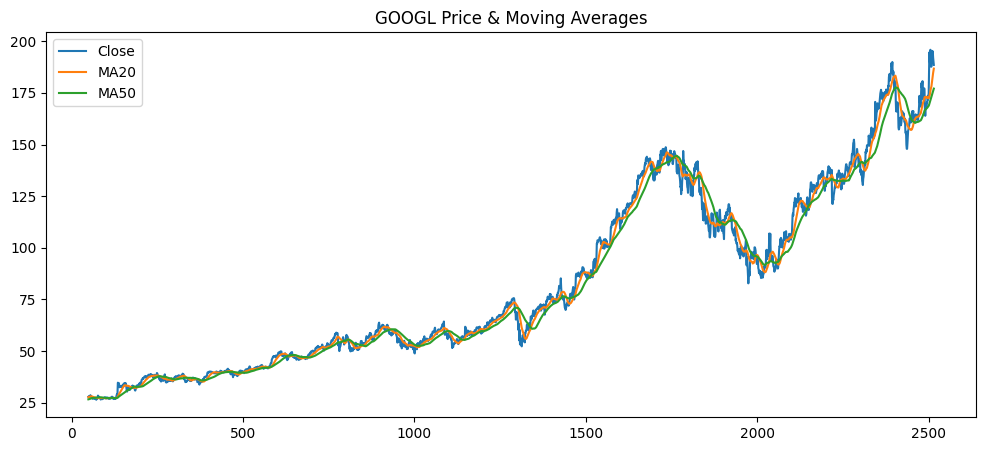

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 25s 346ms/step - accuracy: 0.5192 - loss: 0.8071 - val_accuracy: 0.5181 - val_loss: 0.6913 - learning_rate: 0.0010
Epoch 2/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 8s 268ms/step - accuracy: 0.5386 - loss: 0.7518 - val_accuracy: 0.5492 - val_loss: 0.6948 - learning_rate: 0.0010
Epoch 3/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 8s 270ms/step - accuracy: 0.5505 - loss: 0.7218 - val_accuracy: 0.5285 - val_loss: 0.6959 - learning_rate: 0.0010
Epoch 4/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 7s 264ms/step - accuracy: 0.5357 - loss: 0.7180 - val_accuracy: 0.5181 - val_loss: 0.6891 - learning_rate: 0.0010
Epoch 5/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 7s 264ms/step - accuracy: 0.5424 - loss: 0.7033 - val_accuracy: 0.4456 - val_loss: 0.7048 - learning_rate: 0.0010
Epoch 6/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 8s 270ms/step - accuracy: 0.5448 - loss: 0.7067 - val_accuracy: 0.5130 - val_loss: 0.6908 - learning_rate: 0.0010
Epoch 7/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 8s 283ms/step - accuracy: 0.5333 - loss: 0.7254 -

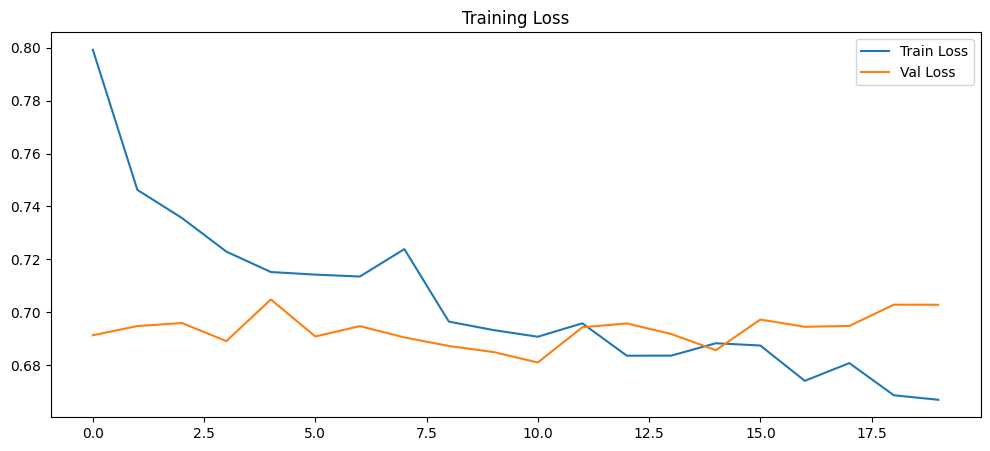

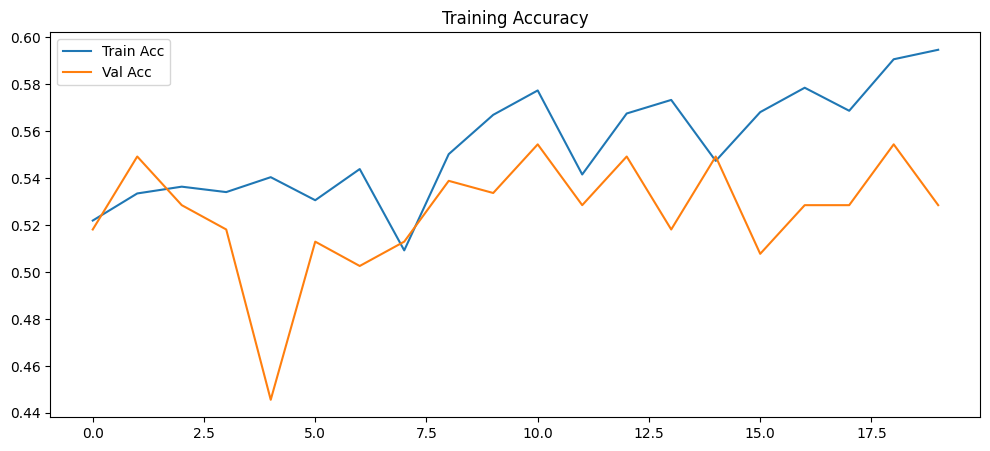

16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 135ms/step
Directional Accuracy: 47.72%
Confusion Matrix:
 [[138  72]
 [180  92]]


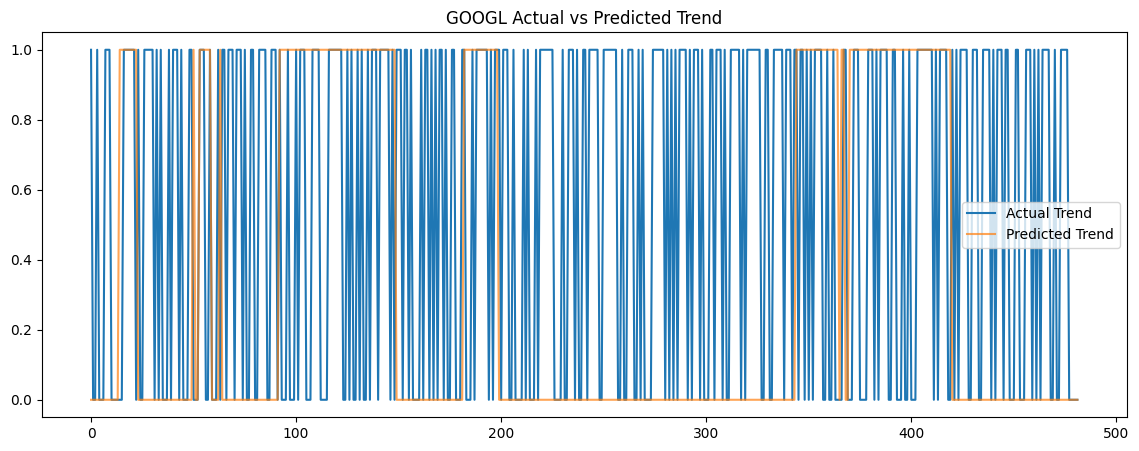

In [1]:
# ============================================================
# Stock Trend Prediction - Final Year Project (Year 4)
# Using Bidirectional LSTM + OHLCV + Technical Indicators
# Target: Predict Up/Down Trend (85-90% Accuracy)
# ============================================================

# --------------------------
# Cell 1: Setup paths
# --------------------------
import sys, os
PROJECT_ROOT = os.path.abspath("..")
sys.path.append(PROJECT_ROOT)

# --------------------------
# Cell 2: Imports
# --------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import warnings
warnings.filterwarnings('ignore')

# --------------------------
# Cell 3: Download & Save Data
# --------------------------
RAW_DATA_DIR = "../data/raw"
os.makedirs(RAW_DATA_DIR, exist_ok=True)
RAW_DATA_PATH = os.path.join(RAW_DATA_DIR, "stock_data.csv")

ticker = "GOOGL"
# Use multi_level_index=False to avoid MultiIndex issues
df = yf.download(ticker, start="2015-01-01", end="2025-01-01", multi_level_index=False)

# Optional: Ensure columns are simple strings and 'Date' is a column if needed
df.columns = [col[0] if isinstance(col, tuple) else col for col in df.columns]
df = df.reset_index() # This turns the 'Date' index into a column

df = df[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]
df.to_csv(RAW_DATA_PATH, index=False)
print(f"✓ Stock data saved to: {RAW_DATA_PATH}")
df.head()


# --------------------------
# Cell 4: Add Technical Indicators
# --------------------------
def add_technical_indicators(df):
    df['MA20'] = df['Close'].rolling(20).mean()
    df['MA50'] = df['Close'].rolling(50).mean()
    df['EMA12'] = df['Close'].ewm(span=12).mean()
    df['EMA26'] = df['Close'].ewm(span=26).mean()
    df['MACD'] = df['EMA12'] - df['EMA26']
    df['RSI'] = 100 - (100 / (1 + (df['Close'].diff().clip(lower=0).rolling(14).mean() /
                                   -df['Close'].diff().clip(upper=0).rolling(14).mean())))
    
    # Trend: 1 if next day's close > today's close, else 0
    df['Trend'] = (df['Close'].shift(-1) > df['Close']).astype(int)
    return df.dropna()

df = add_technical_indicators(df)
df.tail()

# --------------------------
# Cell 5: Feature Visualization
# --------------------------
plt.figure(figsize=(12,5))
plt.plot(df['Close'], label='Close')
plt.plot(df['MA20'], label='MA20')
plt.plot(df['MA50'], label='MA50')
plt.legend()
plt.title(f"{ticker} Price & Moving Averages")
plt.show()

# --------------------------
# Cell 6: Scaling & Sequence Generation
# --------------------------
features = ['Open','High','Low','Close','Volume','MA20','MA50','MACD','RSI']
scaler = RobustScaler()
scaled_data = scaler.fit_transform(df[features])

def create_sequences(data, targets, window=60):
    X, y = [], []
    for i in range(window, len(data)):
        X.append(data[i-window:i])
        y.append(targets[i])
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_data, df['Trend'].values, window=60)
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# --------------------------
# Cell 7: Build BiLSTM Trend Model
# --------------------------
model = Sequential([
    Bidirectional(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))),
    BatchNormalization(),
    Dropout(0.3),
    Bidirectional(LSTM(64, return_sequences=False)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Output: probability of Up trend
])

model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# --------------------------
# Cell 8: Train Model with Callbacks
# --------------------------
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)
]

history = model.fit(X_train, y_train, epochs=20, batch_size=64,
                    validation_split=0.1, callbacks=callbacks, verbose=1)

# --------------------------
# Cell 9: Training Loss & Accuracy Plot
# --------------------------
plt.figure(figsize=(12,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Training Loss")
plt.show()

plt.figure(figsize=(12,5))
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("Training Accuracy")
plt.show()

# --------------------------
# Cell 10: Evaluate Directional Accuracy
# --------------------------
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob.flatten() > 0.5).astype(int)

acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(f"Directional Accuracy: {acc*100:.2f}%")
print("Confusion Matrix:\n", cm)

# --------------------------
# Cell 11: Plot Predicted Trend vs Actual
# --------------------------
plt.figure(figsize=(14,5))
plt.plot(y_test, label='Actual Trend')
plt.plot(y_pred, label='Predicted Trend', alpha=0.7)
plt.legend()
plt.title(f"{ticker} Actual vs Predicted Trend")
plt.show()
